# 1. Conditional Probability

Suppose a COVID-19 test gives a positive result in 90% of cases when a person is actually infected and a negative result in 95% of cases when they are not infected.

In other words:

P(test pos | Corona) = 0.9<br>
P(test neg | no Corona) = 0.95

We also know that COVID-19 has affected about 10% of the population.

P(Corona) = 0.1

You used this test and your result was positive.

What is the probability that you are actually infected? 0.67

What if the test was negative? 0.12

Solve the problem theoretically using Bayes' rule.

To get a better understanding of the problem, we can use R language and sampling.

First, create a sample population of 100,000 people using the `sample` function.

Note that the probability of being infected with COVID-19 is 10%, and the population members either have or do not have COVID-19.


In [14]:
corona <- sample(c("No","Yes"), size=100000, replace=TRUE, prob=c(0.9,0.1))

Now, using the `sample` function, create a set of test results.
In this way...


In [15]:
test_result <- rep(NA, 100000)
test_result[corona=="No"] <- sample(c("Neg","Pos"), size=sum(corona=="No"), replace=TRUE, prob=c(0.95,0.05))
test_result[corona=="Yes"] <- sample(c("Neg","Pos"), size=sum(corona=="Yes"), replace=TRUE, prob=c(0.1, 0.9))

Given that your COVID test result is positive, what is the probability that you are actually infected with COVID?

Examine how this probability changes without testing.

Is it better to consider the final probability obtained when interpreting COVID test results, or should we focus on the increase in the likelihood of infection compared to the scenario without testing?

In [16]:
mean(corona[test_result=="Pos"]=="Yes")

[1] 0.6645152

In [17]:
mean(corona[test_result=="Pos"]=="Yes") / mean(corona=="Yes")

[1] 6.693344

# 2. Monty Hall Problem
In the lesson, we became familiar with the Monty Hall Problem.

In this exercise, you are expected to intuitively investigate this problem through sampling.

Try to explore the problem with 3, 4, and 100 doors, and report the results for each case.

In [18]:
# Inputs:
#    make_switch: TRUE or FALSE based on the given choice of the player.
#                 If TRUE, the player wants a switch.
# Output of function determines that the player is a winner or not.
# Monty Hall game for 100 doors...

simulate_game = function(make_switch = FALSE) {
  n_doors = 3

  # Create a integer vector for the door indices.
  doors = seq_len(n_doors)

  # Create a boolean vector showing which doors are opened.
  # All doors are closed at the start of the game.
  is_closed = rep(TRUE, length=n_doors)

  # Sample one index for the door to hide the prize behind.
  # From now on, we call it the prize door.
  prize_index = sample(doors, size=1)

  # Sample one index for the door initially chosen by the player.
  # This can be the same door as the prize door. So there is no need to
  # eliminate any door.
  choice_index = sample(doors, size=1)

  # Now Monty Hall opens the door the player did not choose.
  # If the player has already picked the prize door, the one remaining
  # closed door has a no prize.
  # If the player has not picked the prize door, the one remaining closed
  # door has the prize.
  # If the player has the prize, Monty Hall has 99 options to choose from.
  # The door which the player has chosen (the prize door) needs to be
  # eliminated.
  # Else, Monty Hall has 98 remaining doors to choose from.
  # We eliminate the chosen and the prize door.
  is_closed[sample(doors[doors != prize_index & doors != choice_index], size=1)] = FALSE


  # Now Monty Hall asks the player whether he/she wants to make a switch
  if (make_switch) {
    # If the player decides to make a switch, then he/she has to pick
    # one of the closed doors.
    # We need to make sure it is not the one the player chose initially.
    choice_index = sample(doors[is_closed & doors != choice_index], size=1)
  }

  # Return a boolean value showing whether the player's choice is the prize door
  # or not.
  return(choice_index == prize_index)
}

In [19]:
# Inputs:
#    make_switch: TRUE or FALSE based on the given choice of the player.
#                 If TRUE, the player wants a switch.
#    n: Number of games we want to simulate.
# Output of function determines that the player is a winner or not in all games.

simulate_n_games = function(n, make_switch) {
  return(vapply(rep(make_switch, n), simulate_game, logical(1)))
}

In [20]:
n_games = 100

# Simulate games and store the boolean results in both cases.
results_without_switching = simulate_n_games(n = n_games, make_switch = FALSE)
results_with_switching = simulate_n_games(n = n_games, make_switch = TRUE)

# Store the cumulative wins in a dataframe.
results = data.frame(
  # First column
  game = seq_len(n_games),
  # Second column
  cumulative_wins_without_switching = cumsum(results_without_switching),
  # Third column
  cumulative_wins_with_switching = cumsum(results_with_switching)
)

# Printing ten rows of stored data.
head(results, 10)

,game,cumulative_wins_without_switching,cumulative_wins_with_switching
,<int>,<int>,<int>
1,1,0,1
2,2,1,2
3,3,1,2
4,4,1,2
5,5,2,2
6,6,2,2
7,7,3,3
8,8,3,4
9,9,3,4


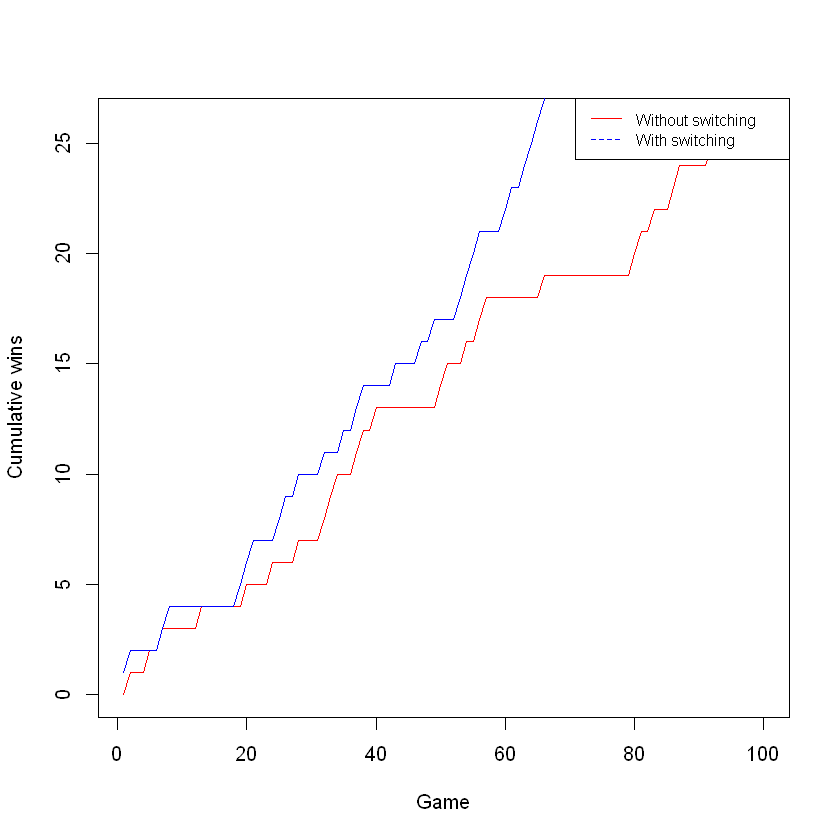

In [23]:
# Plotting the results
plot(results$game, results$cumulative_wins_without_switching, type="l", col="red", xlab="Game", ylab="Cumulative wins")
lines(results$game, results$cumulative_wins_with_switching, col="blue")
legend("topright", legend=c("Without switching", "With switching"), col=c("red", "blue"), lty=1:2, cex=0.8)

In [27]:
# get the accumulative win in two cases
cumsum(results_without_switching)
cumsum(results_with_switching)

[1]  0  1  1  1  2  2  3  3  3  3  3  3  4  4  4  4  4  4  4  5  5  5  5  6  6
 [26]  6  6  7  7  7  7  8  9 10 10 10 11 12 12 13 13 13 13 13 13 13 13 13 13 14
 [51] 15 15 15 16 16 17 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19
 [76] 19 19 19 19 20 21 21 22 22 22 23 24 24 24 24 24 25 25 25 26 26 26 26 26 26

[1]  1  2  2  2  2  2  3  4  4  4  4  4  4  4  4  4  4  4  5  6  7  7  7  7  8
 [26]  9  9 10 10 10 10 11 11 11 12 12 13 14 14 14 14 14 15 15 15 15 16 16 17 17
 [51] 17 17 18 19 20 21 21 21 21 22 23 23 24 25 26 27 28 28 28 28 28 28 28 29 29
 [76] 29 30 31 32 33 33 34 34 34 34 35 35 35 36 37 37 37 37 38 38 38 39 40 40 40